<a href="https://colab.research.google.com/github/sherna90/analisis_algoritmos/blob/master/Hyperparameter_backtracking_tree_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperaparameter Backtracking Tree Search

In [7]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# get some data
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# build a classifier
clf = SGDClassifier(loss='log',learning_rate='constant',eta0=1e-3,fit_intercept=True,shuffle=False)

In [10]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': False,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [12]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9595959595959596

In [13]:
param_grid = {'penalty': ['l2','l1'],
              'eta0': [1e-4,1e-2,1e-1],
              'alpha':[1e-3,1e-2,1e-1,1.0,10.]}

# run randomized search
grid_search = GridSearchCV(clf, param_grid=param_grid)

start = time()
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='constant', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=False,
                                     tol=0.001, validation_fraction=0.1,
                                     verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'eta0': [0.0001, 0.01, 0.1], 'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [14]:
grid_search.best_params_

{'alpha': 0.01, 'eta0': 0.0001, 'penalty': 'l1'}

In [15]:
clf.set_params(**grid_search.best_params_)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l1', power_t=0.5, random_state=None, shuffle=False,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l1', power_t=0.5, random_state=None, shuffle=False,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
clf.score(X_test,y_test)

0.9579124579124579

# Backtracking Tree Search

In [50]:
import itertools

def score(clf,X_train,y_train,X_test,y_test,par):
  clf.set_params(**par)
  clf.fit(X_train,y_train)
  return clf.score(X_test,y_test)

param_grid = {'penalty': ['l2','l1'],
              'eta0': np.linspace(0.0001,1.0,10),
              'alpha':np.linspace(0.001,1.0,10)}

params=[ [{u:v} for u,vals in param_grid.items() for v in vals if u==node] for node in param_grid.keys()]

i=1
max_val=-np.infty
min_val=np.infty
for element in itertools.product(*params):
  par=dict()
  for v in element:
    par.update(v)
  current_val=score(clf,X_train,y_train,X_test,y_test,par)
  print(i,par,current_val)
  min_val=min(current_val,min_val)
  max_val=max(current_val,max_val)
  i+=1
print('min val {0}, max_val : {1}'.format(min_val,max_val))

1 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.001} 0.9612794612794613
2 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.112} 0.9629629629629629
3 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.223} 0.9629629629629629
4 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.334} 0.9612794612794613
5 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.445} 0.9579124579124579
6 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.556} 0.9562289562289562
7 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.667} 0.9545454545454546
8 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.778} 0.9545454545454546
9 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 0.889} 0.9528619528619529
10 {'penalty': 'l2', 'eta0': 0.0001, 'alpha': 1.0} 0.9511784511784511
11 {'penalty': 'l2', 'eta0': 0.11120000000000001, 'alpha': 0.001} 0.8956228956228957
12 {'penalty': 'l2', 'eta0': 0.11120000000000001, 'alpha': 0.112} 0.5185185185185185
13 {'penalty': 'l2', 'eta0': 0.11120000000000001, 'alpha': 0.223} 0.15488215488215487
14 {'penalty': 'l2', 'eta0': 0.1112

# Hyperactive Simulated Annealing

In [23]:
!pip install hyperactive

     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [51]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from scipy.stats import gamma

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import scipy

from hyperactive import Hyperactive, SimulatedAnnealingOptimizer

# get some data
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# build a classifier
clf = SGDClassifier(loss='log',learning_rate='constant',eta0=1e-3,fit_intercept=True,shuffle=False)



def model(par):
    clf.set_params(**par)
    clf.fit(X_train,y_train)
    return clf.score(X_test,y_test)


param_grid = {'penalty': ['l2','l1'],
              'eta0': loguniform(1e-3,1e0).rvs(10000),
              'alpha':gamma(.5,1e-3).rvs(10000)}



optimizer = SimulatedAnnealingOptimizer(
    epsilon=0.1,
    distribution="laplace",
    n_neighbours=4,
    rand_rest_p=0.1,
    p_accept=0.15,
    norm_factor="adaptive",
    annealing_rate=0.999,
    start_temp=0.8,
)

hyper = Hyperactive()
hyper.add_search(model, param_grid, optimizer=optimizer, n_iter=100)
hyper.run()


Results: 'model'  
   Best score: 0.9545454545454546  
   Best parameter set:
      'penalty' : l2  
      'eta0'    : 0.0012194055429015237  
      'alpha'   : 0.09595628954124737  
   Best iteration: 67  
 
   Evaluation time   : 7.650762319564819 sec    [97.99 %]
   Optimization time : 0.15677332878112793 sec    [2.01 %]
   Iteration time    : 7.807535648345947 sec    [12.81 iter/sec]
 


# Random Search


In [53]:
from sklearn.model_selection import ParameterSampler

def model(clf,X_train,y_train,X_test,y_test,par):
  clf.set_params(**par)
  clf.fit(X_train,y_train)
  return clf.score(X_test,y_test)

param_dist = {'penalty': ['l2','l1'],
              'eta0': loguniform(1e-3,1e0),
              'alpha':gamma(.5,1e-3)}

param_list = list(ParameterSampler(param_dist, n_iter=100))

max_val=-np.infty
min_val=np.infty
for i,par in enumerate(param_list):
  current_val=model(clf,X_train,y_train,X_test,y_test,par)
  min_val=min(current_val,min_val)
  max_val=max(current_val,max_val)
  print('Parametro {0}, score : {1}'.format(i,current_val))

print('min val {0}, max_val : {1}'.format(min_val,max_val))

Parametro 0, score : 0.27104377104377103
Parametro 1, score : 0.09259259259259259
Parametro 2, score : 0.09259259259259259
Parametro 3, score : 0.877104377104377
Parametro 4, score : 0.14309764309764308
Parametro 5, score : 0.09764309764309764
Parametro 6, score : 0.8737373737373737
Parametro 7, score : 0.5168350168350169
Parametro 8, score : 0.6060606060606061
Parametro 9, score : 0.9057239057239057
Parametro 10, score : 0.9074074074074074
Parametro 11, score : 0.8703703703703703
Parametro 12, score : 0.7070707070707071
Parametro 13, score : 0.9562289562289562
Parametro 14, score : 0.7138047138047138
Parametro 15, score : 0.19696969696969696
Parametro 16, score : 0.9057239057239057
Parametro 17, score : 0.8552188552188552
Parametro 18, score : 0.8063973063973064
Parametro 19, score : 0.9562289562289562
Parametro 20, score : 0.5185185185185185
Parametro 21, score : 0.1936026936026936
Parametro 22, score : 0.8417508417508418
Parametro 23, score : 0.10774410774410774
Parametro 24, score 

# Simulated Annealing

In [55]:
import math

class temperature_scheduling:
    
    def __init__(self,initial_temperature,min_temperature,gamma):
        self.initial_temperature=initial_temperature
        self.min_temperature=min_temperature
        self.temperature=initial_temperature
        self.gamma=gamma
        
    def exponential_decay(self):
        self.temperature=self.gamma*self.temperature
        return max(self.temperature,self.min_temperature)
    
    def fast_decay(self,k):
        self.temperature=self.initial_temperature/k
        return max(self.temperature,self.min_temperature)
    
    def logarithmic_decay(self,k):
        self.temperature=self.initial_temperature*math.log(2,2)/math.log(k+1,2)
        return max(self.temperature,self.min_temperature)

In [56]:
from sklearn.model_selection import ParameterSampler
import copy 

def mutation(param_dist,par,prior=False):
  new_par=copy.deepcopy(par) 
  param_to_update = np.random.choice(list(param_dist.keys()))
  param_vals = param_dist[param_to_update]
  if isinstance(param_vals,list):
    new_par[param_to_update]=np.random.choice(param_vals)
  else:
    if prior:
      new_par[param_to_update]=param_vals.rvs()
    else:
      new_par[param_to_update]=np.abs(par[param_to_update]+np.random.normal(0,1e-1))
  return new_par

param_list = list(ParameterSampler(param_dist, n_iter=1))

In [67]:
k=0.85
initial_temperature=1.2*(max_val)
min_temp=1e-4

#par=param_list[0]
temp=temperature_scheduling(initial_temperature,min_temp,k)
current_val=score(clf,X_train,y_train,X_test,y_test,par)
epochs=1000
loss=[]
accept_prob=[]

for i in range(1,epochs):
    new_par=mutation(param_dist,par,prior=True)
    next_value=score(clf,X_train,y_train,X_test,y_test,new_par)
    delta = (next_value-current_val)
    T=temp.logarithmic_decay(i)
    if delta>0:
        par=copy.deepcopy(new_par)
        current_val=next_value
    else:
        alpha=min(1,np.exp(delta/T))
        if alpha>np.random.random():
            par=copy.deepcopy(new_par)
            current_val=next_value
        accept_prob.append(alpha)
    loss.append(current_val)

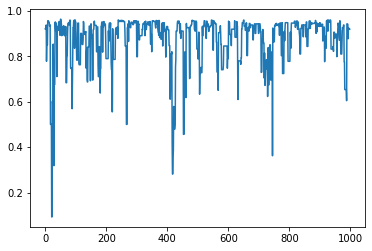

In [68]:
plt.plot(loss)

In [69]:
max(loss)

0.9629629629629629

In [70]:
min(loss)

0.09259259259259259

In [71]:
loss[-1]

0.9191919191919192

In [72]:
par

{'alpha': 0.2612108431069134, 'eta0': 0.003425562625614941, 'penalty': 'l2'}